In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
mpl.style.use('bmh')
import seaborn as sns
import os
os.chdir('C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Interim')

# Sugar Futures (currency in USX)

In [2]:
sugar_df = pdr.get_data_yahoo('SB=F', start='2021-01-01', end='2021-12-31')
sugar_df.index = pd.to_datetime(sugar_df.index)
sugar_df.drop(['High','Low','Open','Volume','Adj Close'], axis='columns', inplace=True)
print(sugar_df.head())
print(sugar_df.shape)

                Close
Date                 
2021-01-04  15.760000
2021-01-05  16.120001
2021-01-06  16.250000
2021-01-07  15.600000
2021-01-08  15.600000
(253, 1)


        Close
count  253.00
mean    17.88
std      1.55
min     14.71
25%     16.55
50%     17.73
75%     19.39
max     20.42


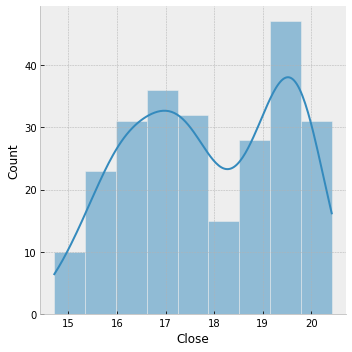

In [7]:
print(sugar_df.describe().round(2))
sns.displot(data=sugar_df, x=sugar_df.Close, kde=True);

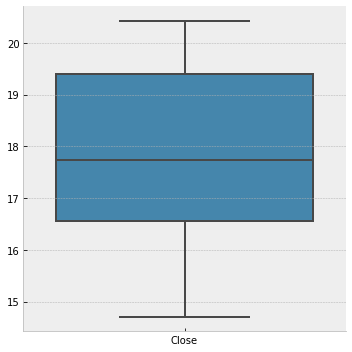

In [8]:
sns.catplot(data=sugar_df, kind="box");

# Ledesma stocks (currency in ARS)

In [9]:
ledesma_df = pdr.get_data_yahoo('LEDE.BA', start='2021-01-01', end='2021-12-31')
ledesma_df.index = pd.to_datetime(ledesma_df.index)
ledesma_df.drop(['High','Low','Open','Volume','Adj Close'], axis='columns', inplace=True)
print(ledesma_df.head())
print(ledesma_df.shape)

                Close
Date                 
2021-01-04  32.900002
2021-01-05  33.250000
2021-01-06  34.000000
2021-01-07  33.000000
2021-01-08  33.000000
(244, 1)


        Close
count  244.00
mean    50.25
std     12.03
min     31.80
25%     37.30
50%     55.25
75%     59.52
max     73.00


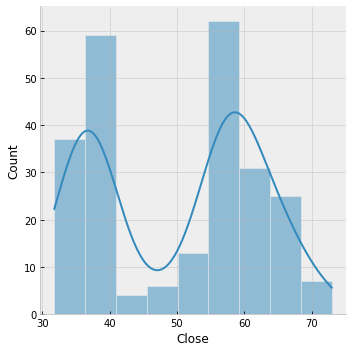

In [10]:
print(ledesma_df.describe().round(2))
sns.displot(data=ledesma_df, x=ledesma_df.Close, kde=True);

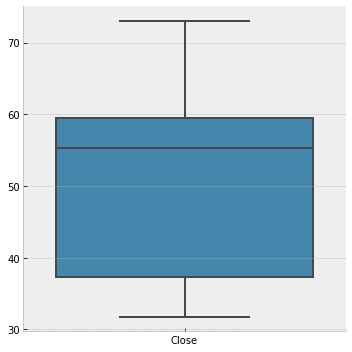

In [11]:
sns.catplot(data=ledesma_df, kind="box");

# Correlation

In [12]:
sugar_ledesma_df = pd.merge(sugar_df, ledesma_df, left_index=True, right_index=True, how="inner")
print(sugar_ledesma_df.head())
print(sugar_ledesma_df.shape)

              Close_x    Close_y
Date                            
2021-01-04  15.760000  32.900002
2021-01-05  16.120001  33.250000
2021-01-06  16.250000  34.000000
2021-01-07  15.600000  33.000000
2021-01-08  15.600000  33.000000
(240, 2)


In [13]:
sugar_ledesma_df.corr()

,Close_x,Close_y
Close_x,1.000000,0.835343
Close_y,0.835343,1.000000


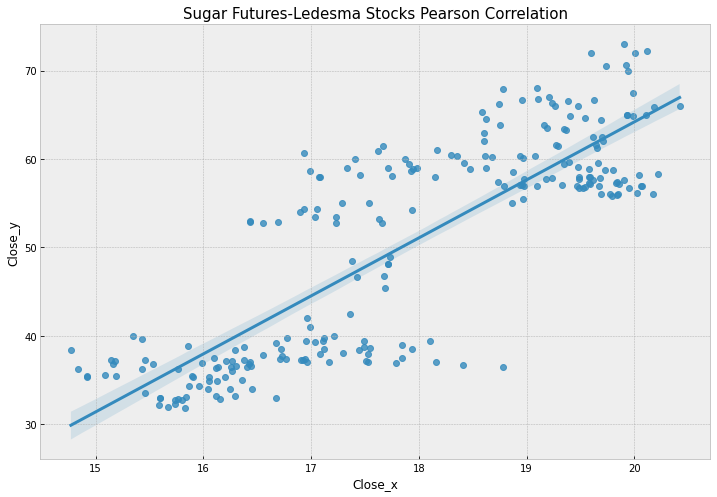

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.regplot(x= sugar_ledesma_df.Close_x, y= sugar_ledesma_df.Close_y)
ax.set_title('Sugar Futures-Ledesma Stocks Pearson Correlation')
ax.title.set_size(15);

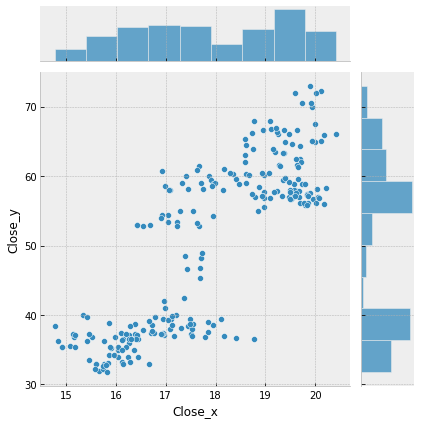

In [15]:
sns.jointplot(x=sugar_ledesma_df.Close_x,y=sugar_ledesma_df.Close_y);

# Modeling Linear Regression

In [16]:
# Beta Test
import pingouin as pg
X = sugar_ledesma_df.iloc[:, :-1].values
y = sugar_ledesma_df.iloc[:, 1].values
b_test = pg.linear_regression(X,y)
b_test

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-67.029944,5.021561,-13.348429,1.030735e-30,0.697798,0.696528,-76.922326,-57.137563
1,x1,6.562018,0.279920,23.442517,8.830894e-64,0.697798,0.696528,6.010582,7.113455


In [17]:
# Model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-68.8913807458718
[6.66846509]


y = -68.90 + 6.70*x

In [18]:
# Predictions
y_pred = regressor.predict(X_test)
test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test

,Actual,Predicted
0,52.799999,41.471711
1,37.400002,44.072421
2,37.200001,39.204432
3,37.049999,45.606165
4,53.400002,44.739271
5,61.599998,62.077270
6,58.200001,64.744666
7,63.000000,55.142072
8,57.299999,61.677165
9,59.700001,60.410153


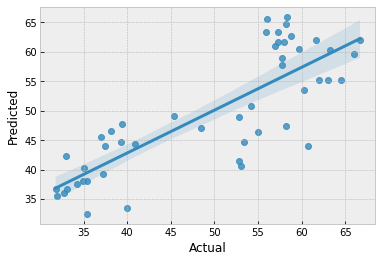

In [19]:
# Plotting predictions
sns.regplot(data=test, x='Actual', y='Predicted');

In [20]:
# Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.6933008614053575
Mean Squared Error: 43.54912812772329
Root Mean Squared Error: 6.599176321914977
